### 1. Importing important liraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 2. Reading the data

__Data is related to Brain Stroke Prediction__

In [109]:
data = pd.read_csv('brain_stroke.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [3]:
data.duplicated().sum()

0

In [4]:
data.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

+ __Here 'stroke' is our label and rest of the colums are feature which will required to predict the lablel of the dataset__

In [7]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [8]:
data.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [13]:
data.shape

(4981, 11)

In [9]:
data.stroke.unique()

array([1, 0], dtype=int64)

In [10]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [14]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [15]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [16]:
data_cat = data[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                 'smoking_status', 'stroke']]

In [19]:
for i in data_cat:
    print(data_cat[i].unique())

['Male' 'Female']
[0 1]
[1 0]
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
[1 0]


In [21]:
for i in data_cat:
    print(data_cat[i].value_counts())

Female    2907
Male      2074
Name: gender, dtype: int64
0    4502
1     479
Name: hypertension, dtype: int64
0    4706
1     275
Name: heart_disease, dtype: int64
Yes    3280
No     1701
Name: ever_married, dtype: int64
Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64
Urban    2532
Rural    2449
Name: Residence_type, dtype: int64
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64
0    4733
1     248
Name: stroke, dtype: int64


### 3.0 Visualization of the data

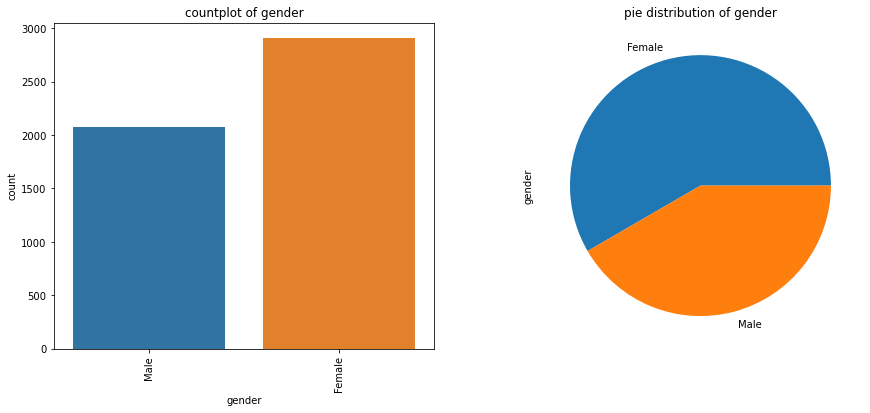

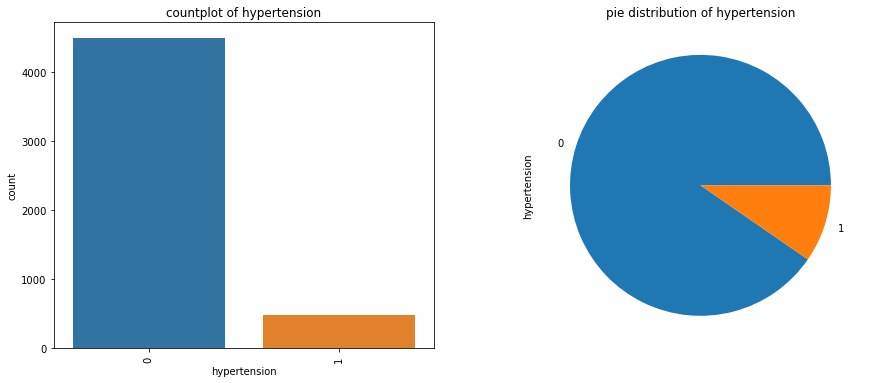

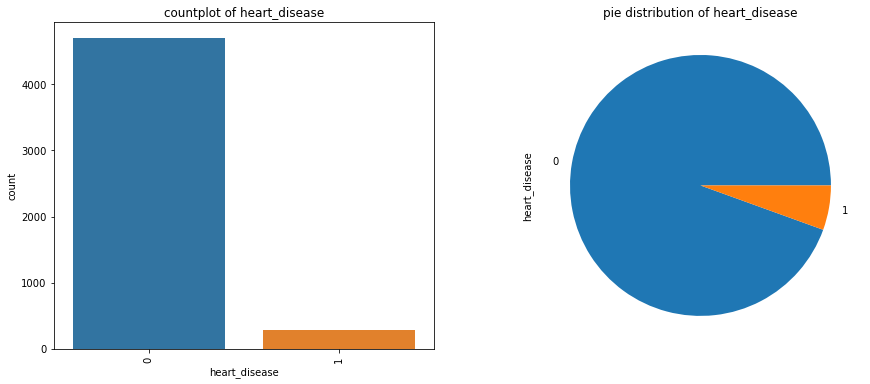

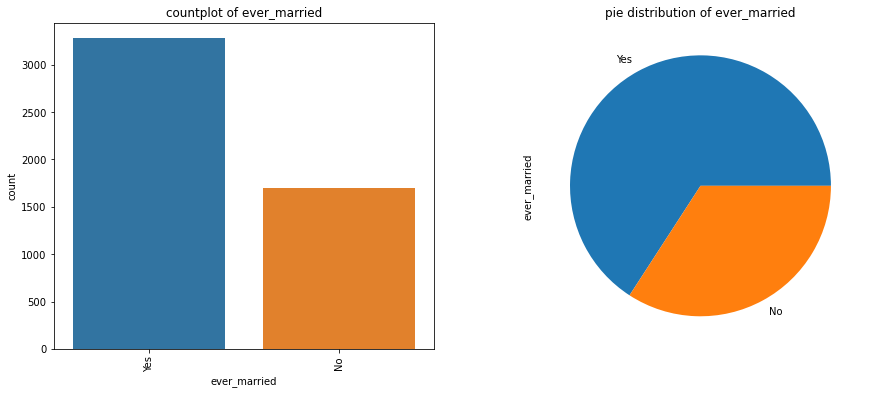

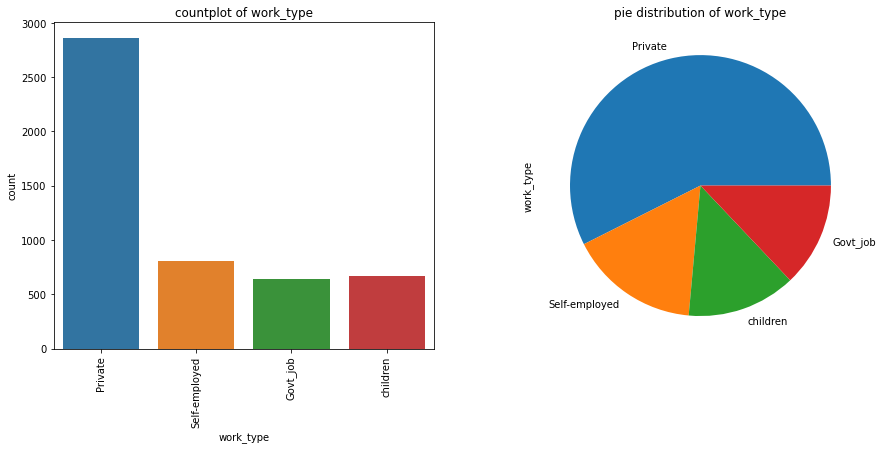

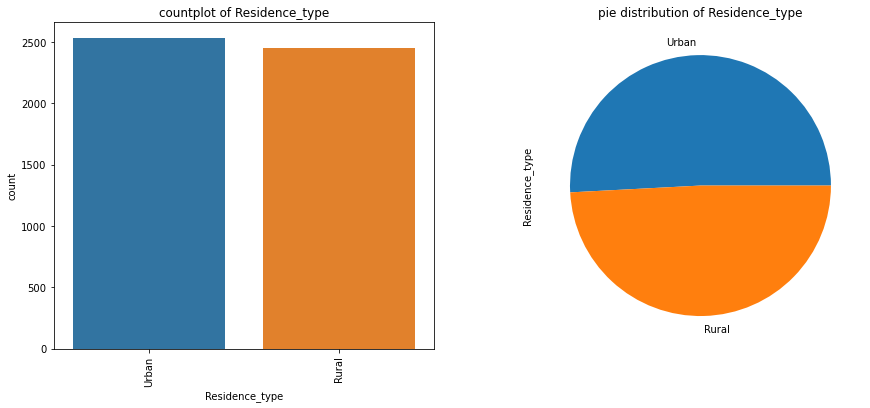

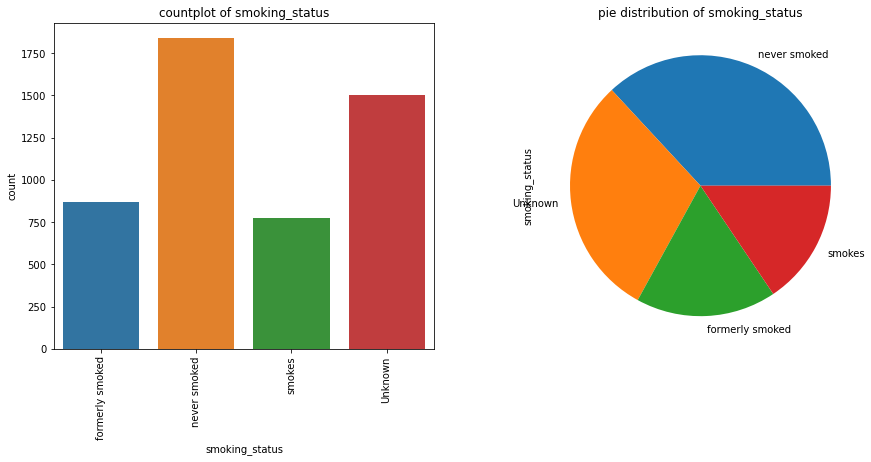

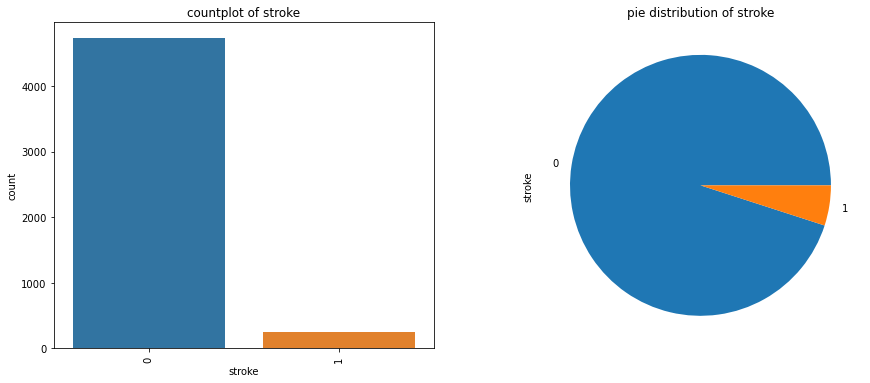

In [29]:
for i in data_cat:
    plt.figure(figsize = (15,6))
    plt.subplot(1,2,1)
    sns.countplot(data_cat[i], data = data_cat)
    plt.xticks(rotation = 90)
    plt.title(f'countplot of {i}')
    
    plt.subplot(1,2,2)
    data_cat[i].value_counts().plot(kind = 'pie')
    plt.title(f'pie distribution of {i}')

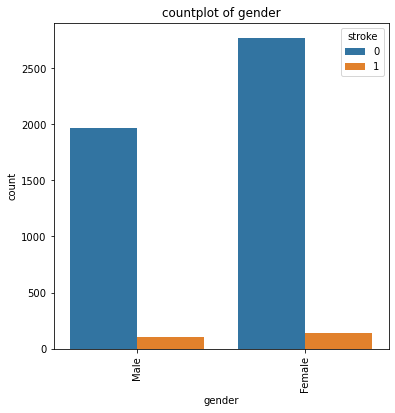

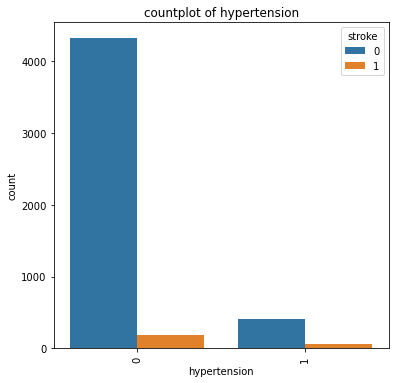

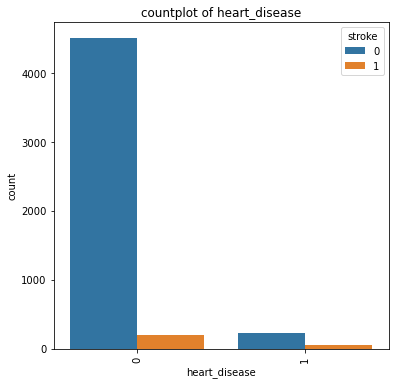

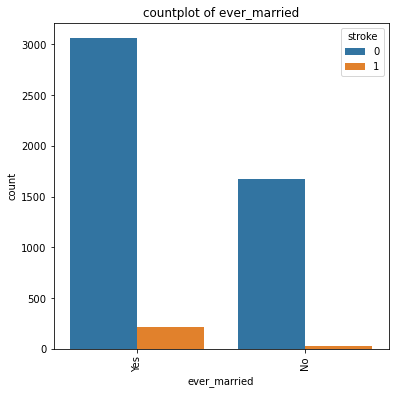

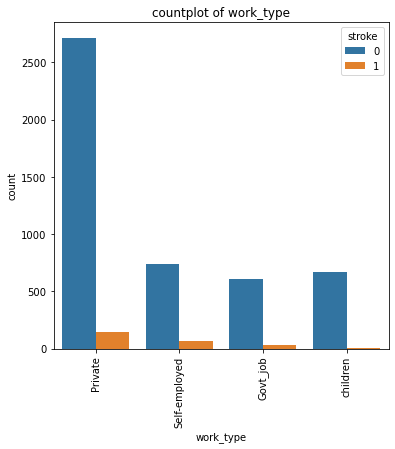

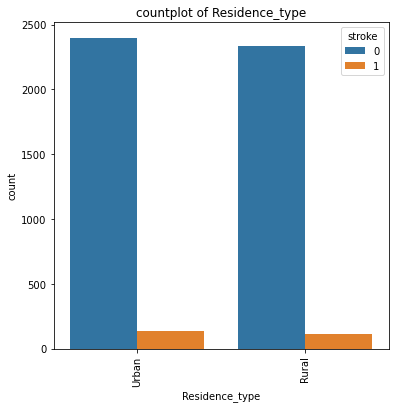

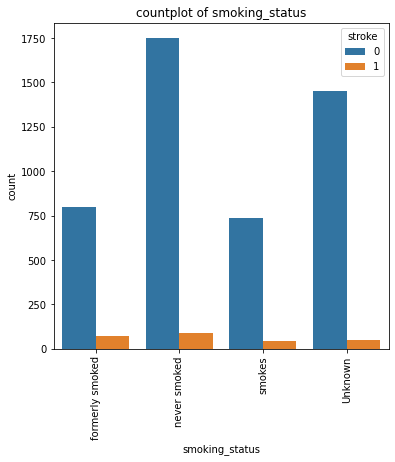

In [34]:
for i in (data_cat.drop('stroke', axis =1)):
    plt.figure(figsize = (6,6))
    sns.countplot(data_cat[i], data = data_cat, hue = 'stroke')
    plt.xticks(rotation = 90)
    plt.title(f'countplot of {i}')

In [54]:
data_num = data[['age', 'avg_glucose_level', 'bmi']]

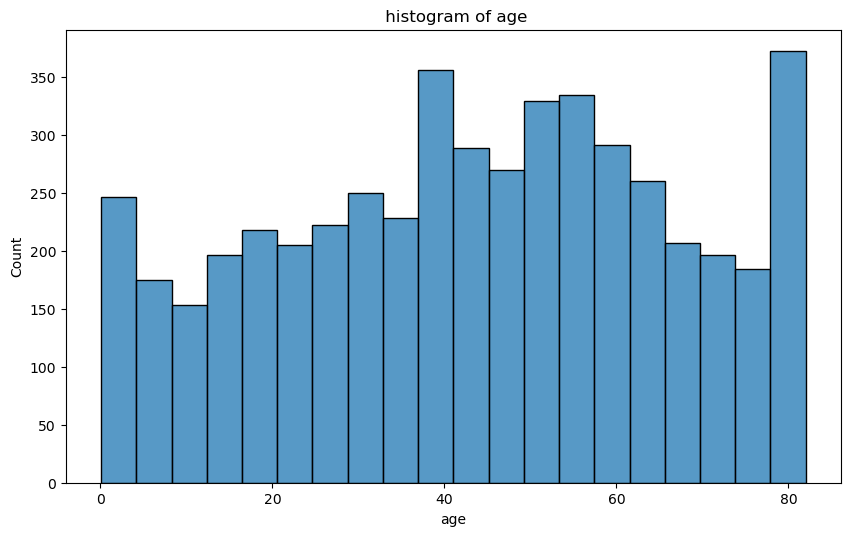

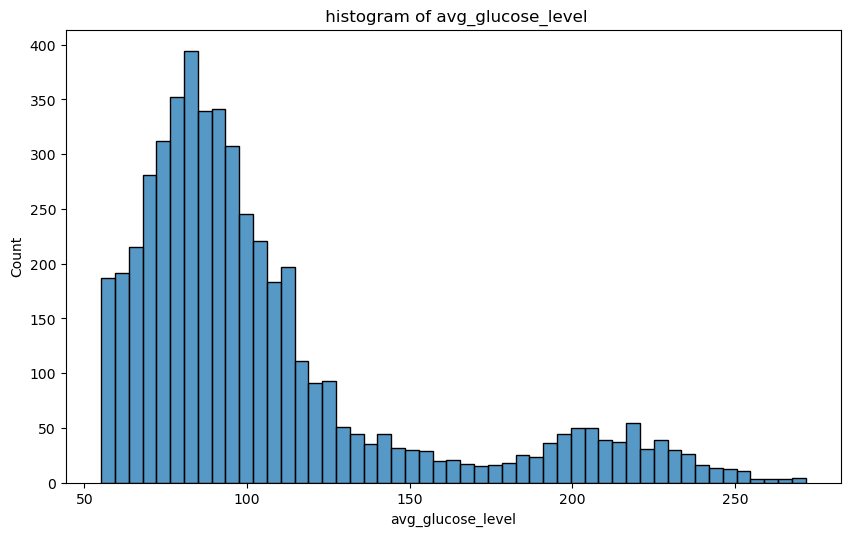

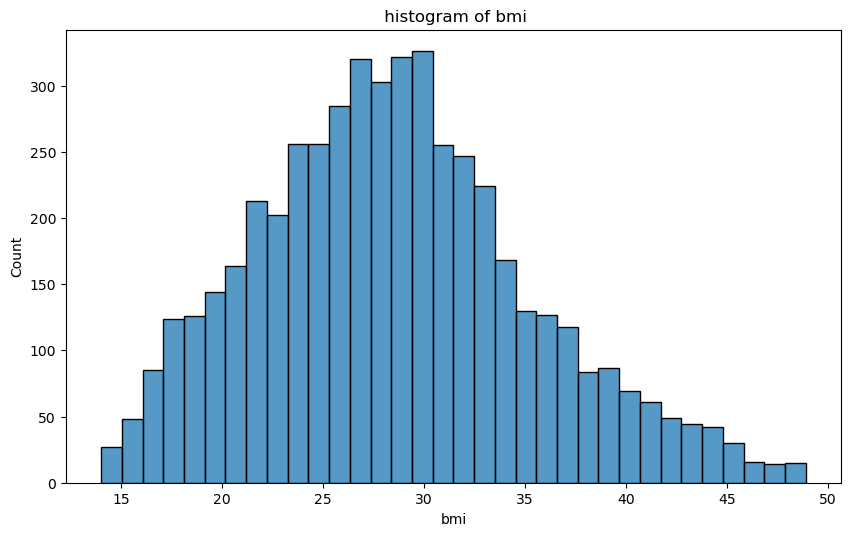

In [39]:
for i in data_num:
    plt.figure(figsize = (10,6),dpi = 100)
    sns.histplot(data_num[i])
    plt.title(f' histogram of {i}')

In [110]:
data['gender'] =[0 if i != 'Yes' else 1 for i in data['gender']]
data['ever_married'] = [0 if i!= 'Yes' else 1 for i in data['ever_married']]
data['Residence_type'] = [0 if i!= 'Urban' else 1 for i in data['Residence_type']]   # Urban  = 1, Rural = 0 

In [111]:
data = pd.get_dummies(data, columns = ['work_type', 'Residence_type','smoking_status'])

In [112]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_0,Residence_type_1,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,1,228.69,36.6,1,0,1,0,0,0,1,0,1,0,0
1,0,80.0,0,1,1,105.92,32.5,1,0,1,0,0,1,0,0,0,1,0
2,0,49.0,0,0,1,171.23,34.4,1,0,1,0,0,0,1,0,0,0,1
3,0,79.0,1,0,1,174.12,24.0,1,0,0,1,0,1,0,0,0,1,0
4,0,81.0,0,0,1,186.21,29.0,1,0,1,0,0,0,1,0,1,0,0


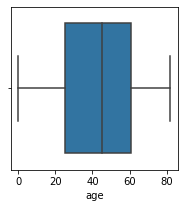

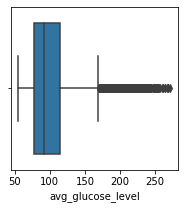

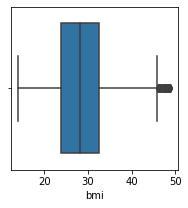

In [55]:
for i in data_num:
    plt.figure(figsize = (3,3))
    sns.boxplot(data_num[i])
    plt.show()

<AxesSubplot:>

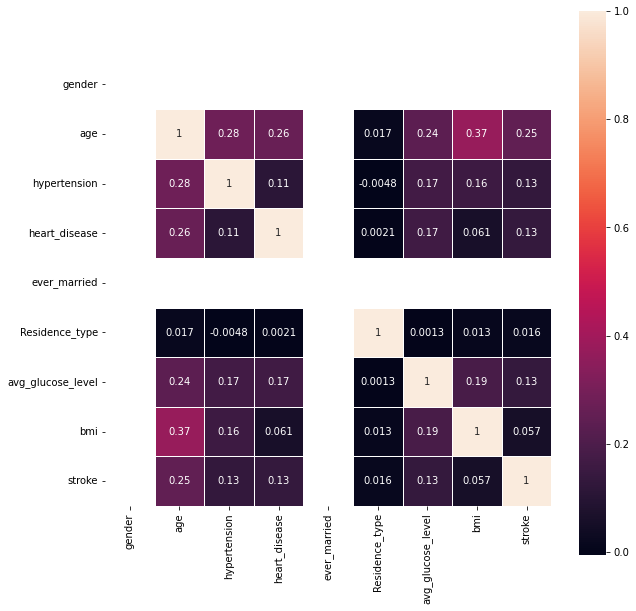

In [71]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot = True,square = True, linewidth = 1)

### 4.0 Modelling of the data

In [113]:
X = data.drop('stroke', axis = 1)
y = data['stroke']

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 0)

In [116]:
X_train.shape

(3337, 17)

In [117]:
X_test.shape

(1644, 17)

#### 4.1 Linear Regression

In [118]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [131]:
pred = lr.predict(X_test)
print(pred)

[-0.00892164  0.18059929 -0.05382114 ...  0.02989946  0.22180167
  0.01722868]


#### 4.1 Logistic Regression

In [127]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [132]:
pred = logreg.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.9555961070559611
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1571
           1       0.00      0.00      0.00        73

    accuracy                           0.96      1644
   macro avg       0.48      0.50      0.49      1644
weighted avg       0.91      0.96      0.93      1644



Text(0.5, 1.0, 'Logistic Regression with accuracy 0.9555961070559611')

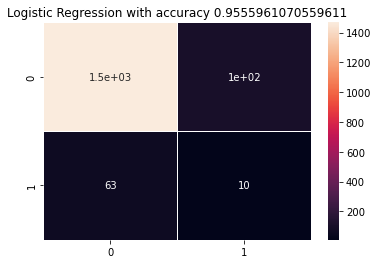

In [139]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot = True, linewidth = 1)
plt.title('Logistic Regression with accuracy 0.9555961070559611')

#### 4.3 Decision Tree Classifier

In [135]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [136]:
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8990267639902676
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1571
           1       0.09      0.14      0.11        73

    accuracy                           0.90      1644
   macro avg       0.52      0.54      0.53      1644
weighted avg       0.92      0.90      0.91      1644



Text(0.5, 1.0, 'Decision Tree Classifer with accuracy of 0.8990267639902676')

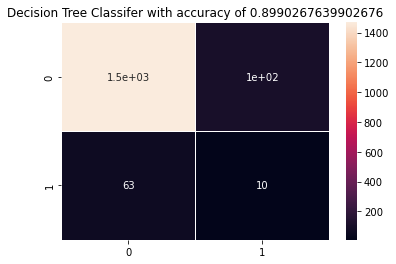

In [138]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, linewidth = 1, annot = True)
plt.title('Decision Tree Classifer with accuracy of 0.8990267639902676')

#### 4.4 Random Forest Classifier

In [141]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [143]:
pred = rfc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.9525547445255474
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1571
           1       0.00      0.00      0.00        73

    accuracy                           0.95      1644
   macro avg       0.48      0.50      0.49      1644
weighted avg       0.91      0.95      0.93      1644



Text(0.5, 1.0, 'Random Forest Classifier with accuracy of 0.9525547445255474')

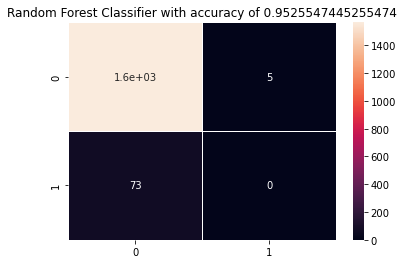

In [144]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot = True, linewidth = 1)
plt.title('Random Forest Classifier with accuracy of 0.9525547445255474')

#### Thank You